# DailyDialog

## Stats

In [1]:
def preprocess_dialogues(file_name):
    dialogues = []
    with open(file_name) as f:
        for line in f:
            turns = line.split('__eou__')
            dialogues.append({
                i: {
                    "text": turn.strip(),
                    "speaker": "user" if i % 2 == 0 else "system"
                } for i, turn in enumerate(turns[:-1])
            })
    return dialogues

In [2]:
train_dialogues = preprocess_dialogues("../original_data/ijcnlp_dailydialog/train/dialogues_train.txt")
valid_dialogues = preprocess_dialogues("../original_data/ijcnlp_dailydialog/validation/dialogues_validation.txt")
test_dialogues = preprocess_dialogues("../original_data/ijcnlp_dailydialog/test/dialogues_test.txt")

In [3]:
total_dials = len(train_dialogues) + len(valid_dialogues) + len(test_dialogues)
total_dials # Ground Truth: 13118

13118

In [4]:
import numpy as np

turn_lengths = np.array([len(dialogue) for dialogue in train_dialogues + valid_dialogues + test_dialogues])
print("AVG # TURNS", turn_lengths.mean()) # Ground Truth: 7.9
print("STD # TURNS", turn_lengths.std())

AVG # TURNS 7.850205824058546
STD # TURNS 3.9865670010741816


In [5]:
for split, data in zip(["TRAIN", "VALID", "TEST"], [train_dialogues, valid_dialogues, test_dialogues]):
    print(split)
    n_dials = len(data)
    turns = np.array([len(dialogue) for dialogue in data])
    print("\t# DIALS", n_dials)
    print("\tAVG # TURNS", turns.mean())
    print("\tSTD # TURNS", turns.std())

TRAIN
	# DIALS 11118
	AVG # TURNS 7.8404389278647235
	STD # TURNS 4.0077831574579745
VALID
	# DIALS 1000
	AVG # TURNS 8.069
	STD # TURNS 3.882555730443544
TEST
	# DIALS 1000
	AVG # TURNS 7.74
	STD # TURNS 3.8424471369167854


In [6]:
from nltk.tokenize import sent_tokenize

for split, data in zip(["TRAIN", "VALID", "TEST"], [train_dialogues, valid_dialogues, test_dialogues]):
    n_dials = len(data)
    tokens_per_dialogue = []
    system_tokens_per_dialogue = []
    sentences_per_turn = []
    tokens_per_turn = []
    system_tokens_per_turn = []
    system_sentences_per_turn = []
    for dial in data:
        tokens_per_dialogue.append(sum([len(turn["text"].split()) for turn in dial.values()]))
        tokens_per_turn += [len(turn["text"].split()) for turn in dial.values()]
        sentences_per_turn += [len(sent_tokenize(turn["text"])) for turn in dial.values()]
        system_tokens_per_dialogue.append(sum([len(turn["text"].split()) for turn in dial.values() if turn["speaker"] == "system"]))
        system_tokens_per_turn += [len(turn["text"].split()) for turn in dial.values() if turn["speaker"] == "system"]
        system_sentences_per_turn += [len(sent_tokenize(turn["text"])) for turn in dial.values() if turn["speaker"] == "system"]

    assert len(tokens_per_dialogue) == n_dials
    print(split)
    #print("\tAVG # TOKENS PER DIAL", np.mean(tokens_per_dialogue))
    #print("\tSTD # TOKENS PER DIAL", np.std(tokens_per_dialogue))
    #print("\tAVG # TOKENS PER TURN", np.mean(tokens_per_turn))
    #print("\tSTD # TOKENS PER TURN", np.std(tokens_per_turn))
    #print("\tAVG # SENTENCES PER TURN", np.mean(sentences_per_turn))
    #print("\tSTD # SENTENCES PER TURN", np.std(sentences_per_turn))
    print("\tAVG # SYSTEM TOKENS PER DIAL", np.mean(system_tokens_per_dialogue))
    print("\tSTD # SYSTEM TOKENS PER DIAL", np.std(system_tokens_per_dialogue))
    print("\tAVG # SYSTEM TOKENS PER TURN", np.mean(system_tokens_per_turn))
    print("\tSTD # SYSTEM TOKENS PER TURN", np.std(system_tokens_per_turn))
    print("\tAVG # SYSTEM SENTENCES PER TURN", np.mean(system_sentences_per_turn))
    print("\tSTD # SYSTEM SENTENCES PER TURN", np.std(system_sentences_per_turn))

TRAIN
	AVG # SYSTEM TOKENS PER DIAL 52.666486778197516
	STD # SYSTEM TOKENS PER DIAL 42.05948739190986
	AVG # SYSTEM TOKENS PER TURN 14.063116939260754
	STD # SYSTEM TOKENS PER TURN 10.891815864456143
	AVG # SYSTEM SENTENCES PER TURN 1.663136152940894
	STD # SYSTEM SENTENCES PER TURN 0.899508551754494
VALID
	AVG # SYSTEM TOKENS PER DIAL 53.118
	STD # SYSTEM TOKENS PER DIAL 38.14173666733071
	AVG # SYSTEM TOKENS PER TURN 13.793300441443781
	STD # SYSTEM TOKENS PER TURN 10.410971720297706
	AVG # SYSTEM SENTENCES PER TURN 1.6476239937678525
	STD # SYSTEM SENTENCES PER TURN 0.889773656083814
TEST
	AVG # SYSTEM TOKENS PER DIAL 52.662
	STD # SYSTEM TOKENS PER DIAL 41.68843671811165
	AVG # SYSTEM TOKENS PER TURN 14.232972972972973
	STD # SYSTEM TOKENS PER TURN 11.170099775707893
	AVG # SYSTEM SENTENCES PER TURN 1.6862162162162162
	STD # SYSTEM SENTENCES PER TURN 0.9133687315301714


In [7]:
import math

tokens_per_dialogue = []
system_tokens_per_dialogue = []
sentences_per_turn = []
tokens_per_turn = []
system_tokens_per_turn = []
system_sentences_per_turn = []
for dial in train_dialogues + valid_dialogues:
    tokens_per_dialogue.append(sum([len(turn["text"].split()) for turn in dial.values()]))
    tokens_per_turn += [len(turn["text"].split()) for turn in dial.values()]
    sentences_per_turn += [len(sent_tokenize(turn["text"])) for turn in dial.values()]
    system_tokens_per_dialogue.append(sum([len(turn["text"].split()) for turn in dial.values() if turn["speaker"] == "system"]))
    system_tokens_per_turn += [len(turn["text"].split()) for turn in dial.values() if turn["speaker"] == "system"]
    system_sentences_per_turn += [len(sent_tokenize(turn["text"])) for turn in dial.values() if turn["speaker"] == "system"]

assert len(tokens_per_dialogue) == len(train_dialogues) + len(valid_dialogues)
print("TRAIN + VALID")
print("\tAVG # SYSTEM TOKENS PER TURN", np.mean(system_tokens_per_turn))
print("\tSTD # SYSTEM TOKENS PER TURN", np.std(system_tokens_per_turn))
print("\tAVG # SYSTEM SENTENCES PER TURN", np.mean(system_sentences_per_turn))
print("\tSTD # SYSTEM SENTENCES PER TURN", np.std(system_sentences_per_turn))
print()
print(f"97.7% of SYS sentence have no more than {math.ceil(np.mean(system_tokens_per_turn) + 2*np.std(system_tokens_per_turn))} tokens")
print(f"97.7% of SYS turns have no more than {math.ceil(np.mean(system_sentences_per_turn) + 2*np.std(system_sentences_per_turn))} sentences")

TRAIN + VALID
	AVG # SYSTEM TOKENS PER TURN 14.040274358072459
	STD # SYSTEM TOKENS PER TURN 10.852193234095656
	AVG # SYSTEM SENTENCES PER TURN 1.6618228983468168
	STD # SYSTEM SENTENCES PER TURN 0.8986988587406992

97.7% of SYS sentence have no more than 36 tokens
97.7% of SYS turns have no more than 4 sentences


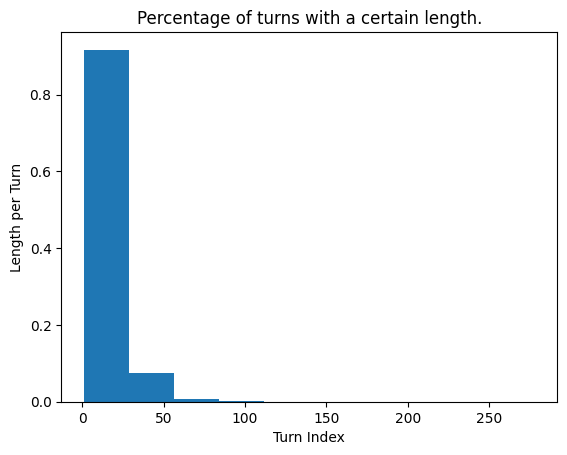

Number of turns 45488


In [8]:
import matplotlib.pyplot as plt

# Calculate the length per turn
lengths = []
for dialogue in valid_dialogues + train_dialogues:
    for turn in dialogue.values():
        if turn["speaker"] == "system":
            lengths.append(len(turn["text"].split()))

# Create the bar plot
y, bins, fig = plt.hist(lengths, 10, weights=[1/len(lengths)]*len(lengths))
plt.xlabel("Turn Index")
plt.ylabel("Length per Turn")
plt.title("Percentage of turns with a certain length.")
plt.show()
print(f"Number of turns {len(lengths)}")


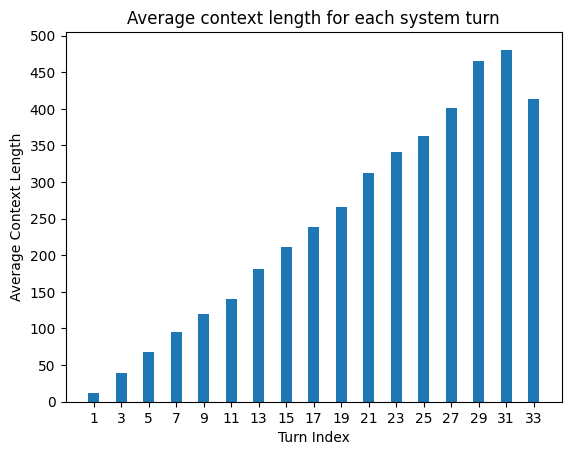

In [9]:
cumulative_lenghts_per_turn = {}

for dialogue in valid_dialogues + train_dialogues:
    context_length = 0
    for i, turn in enumerate(dialogue.values()):
        if turn["speaker"] == "system":
            if i not in cumulative_lenghts_per_turn:
                cumulative_lenghts_per_turn[i] = []
            cumulative_lenghts_per_turn[i].append(context_length)
        context_length += len(turn["text"].split())

cumulative_lenghts_per_turn = {k: np.mean(v) for k, v in cumulative_lenghts_per_turn.items()}
plt.bar(cumulative_lenghts_per_turn.keys(), cumulative_lenghts_per_turn.values())
plt.yticks(np.arange(0, 501, 50))
plt.xticks(np.arange(1, max(cumulative_lenghts_per_turn)+1, 2))
plt.xlabel("Turn Index")
plt.ylabel("Average Context Length")
plt.title("Average context length for each system turn")
plt.show()

## Sample dialogues for generation

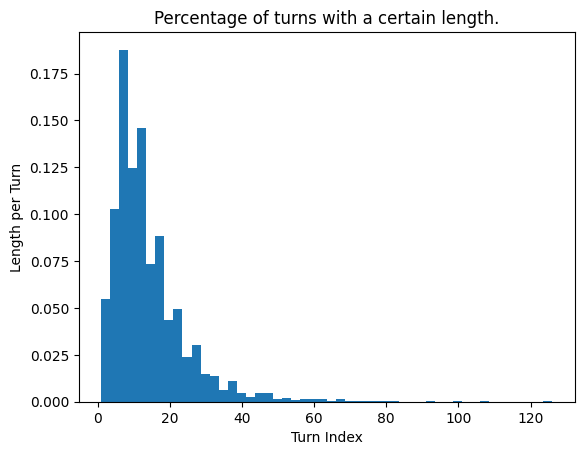

Number of turns 3851


In [22]:
import matplotlib.pyplot as plt

# Calculate the length per turn
lengths = []
for dialogue in valid_dialogues:
    for turn in dialogue.values():
        if turn["speaker"] == "system":
            lengths.append(len(turn["text"].split()))

# Create the bar plot
y, bins, fig = plt.hist(lengths, 50, weights=[1/len(lengths)]*len(lengths))
plt.xlabel("Turn Index")
plt.ylabel("Length per Turn")
plt.title("Percentage of turns with a certain length.")
plt.show()
print(f"Number of turns {len(lengths)}")


In [4]:
from tqdm import tqdm
import random

def prepare_split(dialogues, bins, split_size):

    random.seed(42)
    dataset = {}
    for dial_idx, dial in enumerate(tqdm(dialogues, desc=f"Preparing Stratified split")):
        for turn_idx, turn in dial.items():
            if turn["speaker"] == "system":
                for i, bin in enumerate(bins[1:]):
                    if len(turn["text"].split()) <= bin:
                        if i not in dataset:
                            dataset[i] = []
                        dataset[i].append({
                            "dialogue_id": dial_idx,
                            "turn_id": turn_idx,
                            "speaker": turn["speaker"],
                            "text": turn["text"],
                        })
                        break
    splits = []
    for i, split in dataset.items():
        try:
            splits += random.sample(split, int(len(split) * split_size))
        except ValueError:
            continue

    return splits

In [6]:
splits = prepare_split(valid_dialogues, bins, 0.1)
len(splits)

Preparing Stratified split:   0%|          | 0/1000 [00:00<?, ?it/s]

Preparing Stratified split: 100%|██████████| 1000/1000 [00:00<00:00, 21531.11it/s]


370

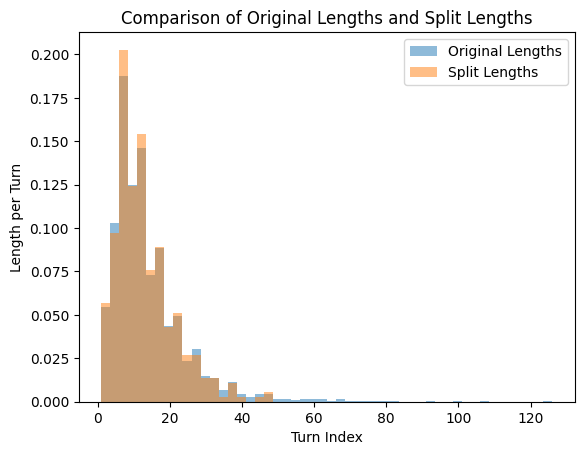

In [7]:
plt.hist(lengths, bins, weights=[1/len(lengths)]*len(lengths), alpha=0.5, label='Original Lengths')
plt.hist([len(sample["text"].split()) for sample in splits], bins, weights=[1/len(splits)]*len(splits), alpha=0.5, label='Split Lengths')
plt.xlabel("Turn Index")
plt.ylabel("Length per Turn")
plt.title("Comparison of Original Lengths and Split Lengths")
plt.legend()
plt.show()


In [8]:
import json

valid_optimization = {}

with open("DailyDialog/valid.json") as f:
    valid_dialogues = json.load(f)

for sample in splits:
    dial_idx = sample["dialogue_id"]
    turn_idx = sample["turn_id"]
    key = f"dial_{dial_idx}_turn_{turn_idx}"
    assert key not in valid_optimization, "Duplicate key"
    valid_optimization[key] = valid_dialogues[key]

with open("DailyDialog/valid_optimization.json", "w") as f:
    json.dump(valid_optimization, f, indent=2)

In [10]:
from transformers import AutoTokenizer

llama = "meta-llama/Llama-2-7b-chat-hf"
mistral = "mistralai/Mistral-7B-Instruct-v0.1"

In [16]:
from tqdm import tqdm
import statistics
tokenizer = AutoTokenizer.from_pretrained(llama)

lengths = []
for sample in tqdm(splits):
    sample["input_ids"] = tokenizer(sample["text"])
    lengths.append(len(sample["input_ids"]["input_ids"]))

max_length = max(lengths)
mean_length = statistics.mean(lengths)

print("Maximum Length:", max_length)
print("Mean Length:", mean_length)


100%|██████████| 370/370 [00:00<00:00, 20370.05it/s]

Maximum Length: 63
Mean Length: 15.78918918918919


## Generation stats

In [1]:
from utils import collect_task_replies

task_replies = collect_task_replies("../output/DailyDialog")

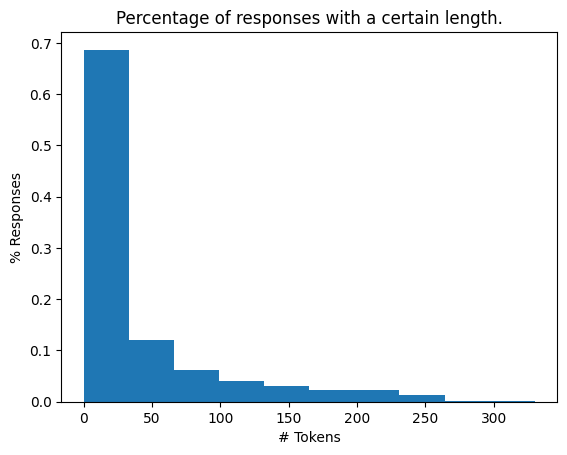

# candidates 14800


In [18]:
import matplotlib.pyplot as plt

lengths = []
for sample_id, sample in task_replies.items():
    for c_name, candidate in sample.items():
        if c_name == "gt":
            continue
        lengths.append(len(candidate.split()))

y, bins, fig = plt.hist(lengths, 10, weights=[1/len(lengths)]*len(lengths))
plt.xlabel("# Tokens")
plt.ylabel("% Responses")
plt.title("Percentage of responses with a certain length.")
plt.show()
print(f"# candidates {len(lengths)}")


In [12]:
len_threshold = 75
lengths_lower_than_threshold = [l for l in lengths if l <= len_threshold]
print(f"Percentage of responses with length lower than {len_threshold}: {round(len(lengths_lower_than_threshold)/len(lengths)*100, 2)}%")

Percentage of responses with length lower than 75: 83.14%


## Sample dialogues for human evaluation

#### Random Sampling

In [1]:
import json

from utils import collect_task_replies, fix_replies_if_necessary

from tqdm import tqdm

task_replies = collect_task_replies("../output/DailyDialog")

with open("../data/DailyDialog/test.json", "r") as f:
    data = json.load(f)

total_possible_samples = 0
valid_samples = {}
for sample_id, sample in tqdm(data.items(), desc="Processing samples"):
    turn_id = sample["turn_id"]
    if turn_id != 5:
        continue
    total_possible_samples += 1

    replies = {model: reply.lower() for model, reply in task_replies[sample_id].items()}

    try:
        candidates = fix_replies_if_necessary(replies, max_tokens=36, max_sentences=4, max_candidate_length=75)
    except:
        continue

    identical_candidates = {}
    for c_name, c in candidates.items():
        remaining_candidates = [value for key, value in candidates.items() if key != c_name]
        if c in remaining_candidates:
            if c not in identical_candidates:
                identical_candidates[c] = []
            identical_candidates[c].append(c_name)

    new_candidates = {}
    for c_name, c in candidates.items():
        if c not in identical_candidates:
            new_candidates[c_name] = c
    
    for c in identical_candidates:
        if "gt" in identical_candidates[c]:
            c_name = "gt"
        else:
            c_name = identical_candidates[c][0]
        new_candidates[c_name] = c

    valid_samples[sample_id] = {
        "sample_id": sample_id,
        "dialogue_id": sample["dialogue_id"],
        "turn_id": turn_id,
        "history": [turn.lower() for turn in sample["dial_history"]],
        "candidates": new_candidates,
        "identical_candidates": identical_candidates,
    }

print("Number of samples:", len(data))
print("Number of samples at turn 5:", total_possible_samples)
print("Number of valid samples:", len(valid_samples))

Processing samples: 100%|██████████| 3700/3700 [00:00<00:00, 21272.44it/s]

Number of samples: 3700
Number of samples at turn 5: 651
Number of valid samples: 511


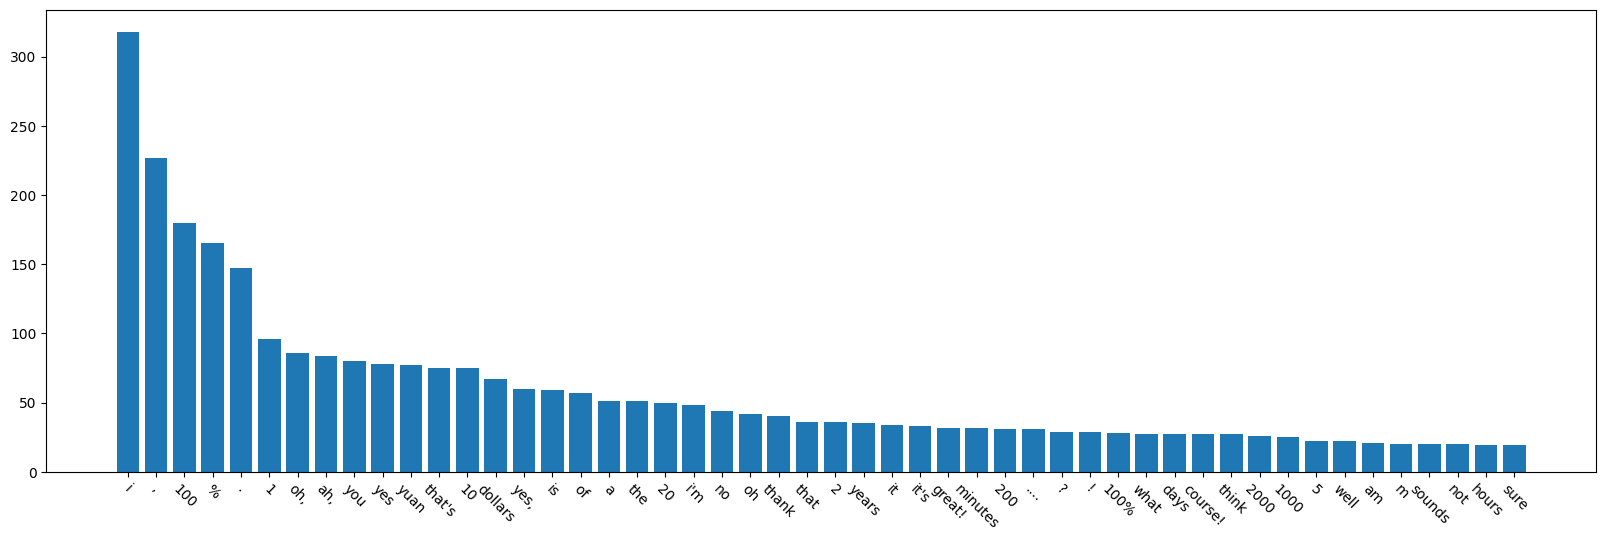

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

tokens = Counter()
for sample in valid_samples.values():
    for candidate in sample["candidates"].values():
        tokens.update([w.lower() for w in candidate.split()[:2]])


most_common = tokens.most_common(200)

plt.figure(figsize=(20, 6))
plt.bar([k[0] for k in most_common[:50]], [k[1] for k in most_common[:50]])
plt.xticks(rotation=-45)
plt.show()



In [3]:
import random

random.seed(7)

n_dial_to_sample = 20

max_history_tokens = 0
max_history_chars = 0
sample_keys = list(valid_samples)
random.shuffle(sample_keys)

samples_to_eval = {}
for sample_id in sample_keys[:n_dial_to_sample]:
    samples_to_eval[sample_id] = valid_samples[sample_id]

    max_history_tokens = max(max_history_tokens, sum([len(turn.split()) for turn in sample["history"]]))
    max_history_chars = max(max_history_chars, sum([len(turn) for turn in sample["history"]]))

print("Number of sampled dialogues:", len(samples_to_eval))

print("Max Token in History:", max_history_tokens)
print("Max Characters in History:", max_history_chars)


with open("../data/DailyDialog/samples_to_eval.json", "w") as f:
    json.dump(samples_to_eval, f, indent=4)

Number of sampled dialogues: 20
Max Token in History: 56
Max Characters in History: 253


## Error Analysis

In [7]:
import json
from tqdm import tqdm

from utils import collect_task_replies

with open("../data/DailyDialog/test.json", "r") as f:
    data = json.load(f)


task_replies = collect_task_replies("../output/DailyDialog")

### BLEU

In [10]:
from parlai.core.metrics import TeacherMetrics

techniques = {}
for sample_id, sample in tqdm(data.items(), desc="Computing F1"):
    reference = sample["text"]
    for key, value in task_replies[sample_id].items():
        if key == "gt":
            continue
        if key not in techniques:
            techniques[key] = TeacherMetrics()
        techniques[key].evaluate_response({"text": value}, [reference])


for technique, metrics in techniques.items():
    print(f"{technique}: {metrics.report()['bleu-4']}")

Computing F1: 100%|██████████| 3700/3700 [00:02<00:00, 1257.97it/s]

llama_ft_none: 0.002815
llama_prompt_none: 0.001873
mistral_ft_none: 0.005204
mistral_prompt_none: 0.002103


### BLEU - Plots

In [2]:
from utils import collect_task_replies

task_replies = collect_task_replies("../output/DailyDialog")

task_replies = {sample_id: {c_name: candidate.lower() for c_name, candidate in sample.items()} for sample_id, sample in task_replies.items() if sample_id.split("_")[-1] == "5"}

replacements = {
    "_": " ",
    ".json": "",
    "mistral": "Mistral",
    "llama": "Llama2",
    "gt": "Ground Truth",
    "none": "",
    "prompt": "Prompt",
    "ft": "Fine-Tuned",
}

#### Average

In [12]:
from utils import plot_cross_bleu

candidates = [
    "gt",
    "llama_ft_none.json",
    "llama_prompt_none.json",
]

plot_cross_bleu(task_replies, candidates, replacements, results_to_plot=['b2_tok', 'b4_tok'])

Computing cross BLEU:   0%|          | 0/651 [00:00<?, ?it/s]

/home/simone/miniconda3/envs/inlg/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/home/simone/miniconda3/envs/inlg/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/home/simone/miniconda3/envs/inlg/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoothi

In [13]:
candidates = [
    "gt",
    "mistral_ft_none.json",
    "mistral_prompt_none.json"
]

plot_cross_bleu(task_replies, candidates, replacements, results_to_plot=['b2_tok', 'b4_tok'])

Computing cross BLEU:   0%|          | 0/651 [00:00<?, ?it/s]

Computing cross BLEU: 100%|██████████| 651/651 [00:01<00:00, 617.27it/s]


#### Max

In [14]:
from utils import plot_cross_bleu

candidates = [
    "gt",
    "llama_ft_none.json",
    "llama_prompt_none.json",
]

plot_cross_bleu(task_replies, candidates, replacements, results_to_plot=['b2_tok', 'b4_tok'], operation="max")

Computing cross BLEU:   0%|          | 0/651 [00:00<?, ?it/s]

Computing cross BLEU: 100%|██████████| 651/651 [00:01<00:00, 440.58it/s]


In [15]:
candidates = [
    "gt",
    "mistral_ft_none.json",
    "mistral_prompt_none.json"
]

plot_cross_bleu(task_replies, candidates, replacements, results_to_plot=['b2_tok', 'b4_tok'], operation="max")

Computing cross BLEU:   0%|          | 0/651 [00:00<?, ?it/s]

Computing cross BLEU: 100%|██████████| 651/651 [00:01<00:00, 650.97it/s]


#### Samples above a threshold

In [16]:
from utils import get_samples_above_threshold


candidates = [
    "gt",
    "llama_ft_none.json",
    "llama_prompt_none.json",
]

llama_samples_above_threshold = get_samples_above_threshold(task_replies, candidates, threshold=1)

print(f"Number of samples above threshold: {round(len(llama_samples_above_threshold)/len(task_replies)*100, 2)}%")

100%|██████████| 651/651 [00:00<00:00, 1249.37it/s]

Number of samples above threshold: 0.0%


In [17]:
from utils import get_samples_above_threshold


candidates = [
    "gt",
    "mistral_ft_none.json",
    "mistral_prompt_none.json",
]

mistral_samples_above_threshold = get_samples_above_threshold(task_replies, candidates, threshold=1)

print(f"Number of samples above threshold: {round(len(mistral_samples_above_threshold)/len(task_replies)*100, 2)}%")

  0%|          | 0/651 [00:00<?, ?it/s]

100%|██████████| 651/651 [00:00<00:00, 1755.84it/s]

Number of samples above threshold: 0.0%


In [18]:
total_samples_above_threshold = llama_samples_above_threshold.union(mistral_samples_above_threshold)
print(f"Total number of samples above threshold: {round(len(total_samples_above_threshold)/len(task_replies)*100, 2)}%")

Total number of samples above threshold: 0.0%
